#1.&nbsp;Central Limit Theorem

Sources:

* "Naked statistics" by  Charles J. Wheelan

A core principle underlying the Central Limit Theorem is that:

**A sufficiently large, properly drawn sample will resemble the population from which it is drawn.**

Using this resemblance, we can make inferences into both directions with regards to the means and the standard deviations ("detailed information"):

* If we have detailed information about a **population**, then we can make inferences about any properly drawn **sample** from that population.

* If we have detailed information about a properly drawn **sample**, we can make inferences about the **population** from which that sample was drawn.

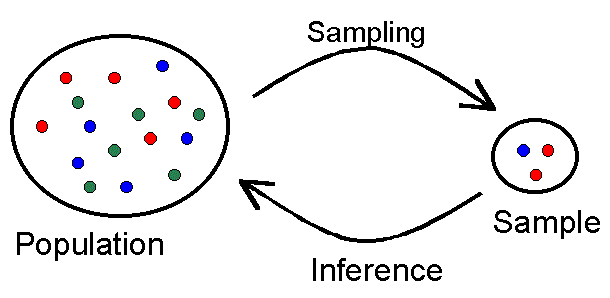
http://testofhypothesis.blogspot.com/2014/09/the-sample.html

The Central Limit Theorem even allows us to make further inferences:
* If we have detailed information about a population and a sample that might or might not have been drawn from that population, we can calculate the probability that that sample was drawn from that population.
* If we have detailed information about two samples, we can calculate the probability that both samples were drawn from the same population.

In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import random

#2.&nbsp;The normal distribution

The normal distribution is a theoretical distribution defined by two mathematical properties: its mean and its standard deviation.

It is a bell-shaped distribution in which:
* 68% of the observations lie within one standard deviation of the mean
* 95% lie within two standard deviations and
* 99.7% lie within three standard deviations.

We can simulate a normal distribution by generating numbers with `stats.norm.rvs`.

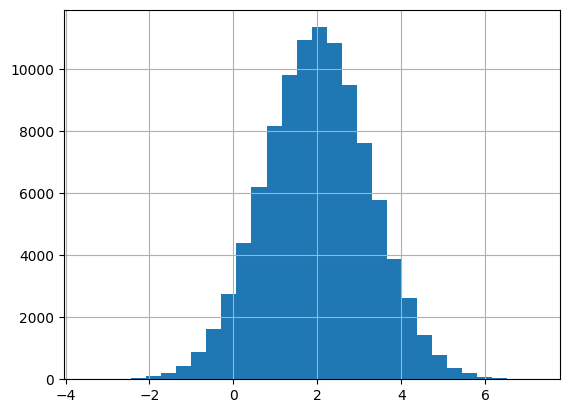

In [2]:
norm_dist = stats.norm.rvs(loc=2, # mean
                           scale=1.25, # standard deviation
                           size=100000,
                           random_state=123
                          )
norm_dist = pd.Series(norm_dist)
norm_dist.hist(bins=30);

Let's check the share of the simulated data that falls within the range of one standard deviation around the mean. To do this, we will follow these steps:

1. Calculate the mean of our sampled normal distribution.
2. Calculate the standard deviation of our sampled normal distribution.
3. Calculate the lower and the upper boundaries, i.e. mean +/- one standard deviation.
4. Check how many of our sampled numbers are within that range.

Note: Our **sampled normal distribution** consists of 100 000 individual samples that were drawn from a **perfect normal distribution** with the specified mean (i.e. 2) and the specified standard deviation (i.e. 1.25).

This means that we expect our **sampled normal distribution** to have a mean *close* to 2 and a standard deviation *close* to 1.25. It also means that we expect to see *close* to 68% of the data points to lie within the range of one standard deviation around the mean.

Any difference is due to the fact that samples will always only *resemble* the population from which they were drawn.

In [3]:
# 1. Calculate the mean of our sampled normal distribution.
mean_norm = np.mean(norm_dist)
mean_norm

2.0016435252189346

In [4]:
# 2. Calculate the standard deviation of our sampled normal distribution.
std_norm = np.std(norm_dist)
std_norm

1.2494627211784164

In [5]:
# 3.1 Calculate the lower boundary, i.e. mean - one standard deviation.
sigma_negative = mean_norm - std_norm
sigma_negative

0.7521808040405182

In [6]:
# 3.2 Calculate the upper boundary, i.e. mean + one standard deviation.
sigma_positive = mean_norm + std_norm
sigma_positive

3.251106246397351

Let's plot our simulated data again, this time inlcuding the mean and the lower and upper boundaries.

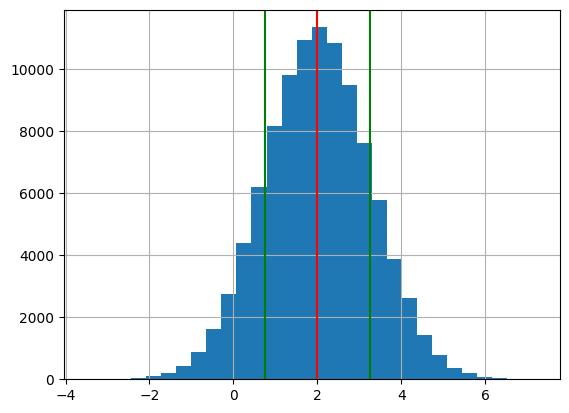

In [7]:
# plot our sampled normal distribution
norm_dist.hist(bins=30)

# plot the mean
plt.axvline(mean_norm, color = 'r')

# plot the lower boundary
plt.axvline(sigma_negative, color = 'g')

# plot the upper boundary
plt.axvline(sigma_positive, color = 'g')

plt.show()

What proportion of our simulated data falls within one standard deviation from the mean?

In [8]:
# Count the number of samples that are greater than the lower boundary and smaller than the upper boundary.
one_std = len(norm_dist[(norm_dist > sigma_negative)
                          & (norm_dist < sigma_positive)])

# Calculate the share from the total number of samples.
one_std_share = one_std/len(norm_dist)

print(f"{round(one_std_share * 100, 2)}% of the sampled data lies within one standard deviation of the mean.")

68.1% of the sampled data lies within one standard deviation of the mean.


What proportion of our simulated data falls beyond one standard deviation from the mean?

In [9]:
# Count the number of samples that are smaller than the lower boundary or greater than the upper boundary.
one_std_inverted = len(norm_dist[(norm_dist < sigma_negative)
                                   | (norm_dist > sigma_positive)])

share_one_std_inverted = one_std_inverted / len(norm_dist)

print(f"{round(share_one_std_inverted * 100, 2)}% of the sampled data lies within one standard deviation of the mean.")

31.9% of the sampled data lies within one standard deviation of the mean.


# Exercise 1

What proportion of our simulated data falls within two standard deviations of the mean? And within three? Beyond two? And beyond three?

In [10]:
# Your code here.
# 2standard deviations
sigma_positive = mean_norm + 2*std_norm
sigma_positive

sigma_negative = mean_norm - 2*std_norm
sigma_negative

# Count the number of samples that are greater than the lower boundary and smaller than the upper boundary.
one_std = len(norm_dist[(norm_dist > sigma_negative)
                          & (norm_dist < sigma_positive)])

# Calculate the share from the total number of samples.
one_std_share = one_std/len(norm_dist)

print(f"{round(one_std_share * 100, 2)}% of the sampled data lies within two standard deviation of the mean.")

#beyond 2 standard deviations
# Count the number of samples that are smaller than the lower boundary or greater than the upper boundary.
one_std_inverted = len(norm_dist[(norm_dist < sigma_negative)
                                   | (norm_dist > sigma_positive)])

share_one_std_inverted = one_std_inverted / len(norm_dist)

print(f"{round(share_one_std_inverted * 100, 2)}% of the sampled data lies within two standard deviation of the mean.")


95.54% of the sampled data lies within two standard deviation of the mean.
4.46% of the sampled data lies within two standard deviation of the mean.


In [11]:
# 3 standard deviations

# Your code here.
# 2standard deviations
sigma_positive = mean_norm + 3*std_norm
sigma_positive

sigma_negative = mean_norm - 3*std_norm
sigma_negative

# Count the number of samples that are greater than the lower boundary and smaller than the upper boundary.
one_std = len(norm_dist[(norm_dist > sigma_negative)
                          & (norm_dist < sigma_positive)])

# Calculate the share from the total number of samples.
one_std_share = one_std/len(norm_dist)

print(f"{round(one_std_share * 100, 2)}% of the sampled data lies within three standard deviation of the mean.")

#beyond 3 standard deviations
# Count the number of samples that are smaller than the lower boundary or greater than the upper boundary.
one_std_inverted = len(norm_dist[(norm_dist < sigma_negative)
                                   | (norm_dist > sigma_positive)])

share_one_std_inverted = one_std_inverted / len(norm_dist)

print(f"{round(share_one_std_inverted * 100, 2)}% of the sampled data lies within three standard deviation of the mean.")


99.74% of the sampled data lies within three standard deviation of the mean.
0.26% of the sampled data lies within three standard deviation of the mean.


In [12]:
# Menna
sigma_negative_2 = mean_norm - 2*std_norm
sigma_negative_2

-0.49728191713789816

In [13]:
sigma_positive_2 = mean_norm + 2*std_norm
sigma_positive_2
one_std = len(norm_dist[(norm_dist > sigma_negative_2)
                          & (norm_dist < sigma_positive_2)])

# Calculate the share from the total number of samples.
one_std_share = one_std/len(norm_dist)

print(f"{round(one_std_share * 100, 2)}% of the sampled data lies within one standard deviation of the mean.")

95.54% of the sampled data lies within one standard deviation of the mean.


#3.&nbsp;A real life distribution

Let's move from theoretical distributions to real populations. Generally, we do not have access to entire populations: we only have access to samples. Therefore, we use these samples to make inferences about the population.

In this exercise, we exceptionally _do_ have access to the entire population so that we can show how to make those inferences, and how accurate they can be.

##3.1&nbsp;The population

Here's the distribution of our population, feel free to make up a story for the numbers

In [14]:
# population.csv
url = 'https://drive.google.com/file/d/1jomahr4JUPi8lAO33_RB1I-1089feWg2/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
population = pd.read_csv(path)

population.describe()

,0
count,12500.000000
mean,3.387146
std,2.438469
min,0.100666
25%,0.947974
50%,2.955376
75%,5.957195
max,9.328558


Let's plot the entire population.

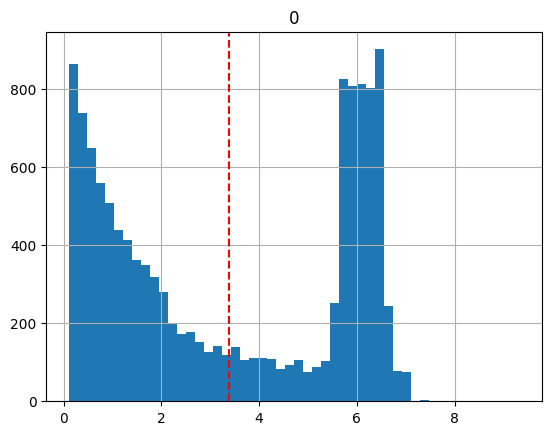

In [15]:
population.hist(bins=50)

# Add a vertical line for the population mean.
plt.axvline(float(population.mean()), linestyle="--", color="r");

##3.2&nbsp;A sample

Let's take a sample from our population and calculate the sample mean. Then, we can compare the sample mean to the population mean.

In [16]:
# Take a sample of sample size 50.
sample = population.sample(n=50, random_state=4321)

Let's plot a histogram for this sample.

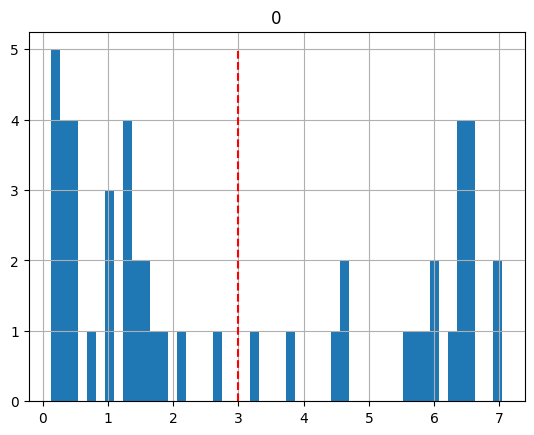

In [17]:
sample.hist(bins=50)

# Add a vertical line for the sample mean.
plt.axvline(float(sample.mean()), linestyle="--", ymax=0.95, color="r");

The mean of the sample is similar but not equal to the mean of the population.

In [18]:
print('Sample mean:', round(float(sample.mean()), 3))
print('Population mean:', round(float(population.mean()), 3))

Sample mean: 2.994
Population mean: 3.387


Let's recap what we know about the sample mean in relation to the population mean:

According to the Central Limit Theorem, the sample means for *any* population will approximately follow a normal distribution, centered around the population mean.

This is true no matter what the distribution of the population looks like. The population from which the samples are being drawn does not have to have a normal distribution in order for the sample means to be distributed normally!

> Note:
* If the population has extreme outliers and the samples are very small, the samples and the population might not resemble each other. By consequence, it is likely that it is hard or even impossible to make the abovementioned inferences.
* Even if a population is higly skewed, the distribution of the sample means is not skewed.
* The larger the number of the samples, the more closely the distribution will approximate the normal distribution.

#4.&nbsp;The Sampling Distribution of the Sample Mean

We just compared the mean of a single sample to the population mean.

Since the Central Limit Theorem is about the distribution of a lot of sample means, we want to repeat the exercise multiple times. We expect that all of these different sample means are approximately normally distributed.

We will follow these steps:

1. Take 100, 1000 or 10 000 samples, each one of size 50.
2. Calculate the mean for each of the samples.
3. Plot all of the 100, 1000 or 10 000 sample means.
4. Check whether these sample means are approximately normally distributed.

##4.1&nbsp;Sampling

In [19]:
# Take 100, 1000 or 10000 samples, each one of size 50.
# Feel free to play around with the number of samples.
number_of_samples = 1000
sample_size = 50
samples = []

for number in range(number_of_samples):
    simple_random_sample = population.sample(n= sample_size,
                                      replace=True
                                     )
    samples.append([simple_random_sample])

The samples variable now contains a list with as many elements as specified in number_of_samples.

Each of these elements contains a list with 50 samples from the population. That's a whole lot of numbers!

##4.2&nbsp;Sample means

Now, we will calculate the mean for each of the samples.

In [20]:
# Store the mean for each of the samples in a list.
sample_means = []

for s in samples:
    sample_means.append(np.mean(s))

# Create a Series with the means.
sampling_dist_sample_mean = pd.Series(sample_means)

The result is the **sampling distribution of the sample mean**.

##4.3&nbsp;Histogram

We want to see the distribution of all the sample means we calculated above.

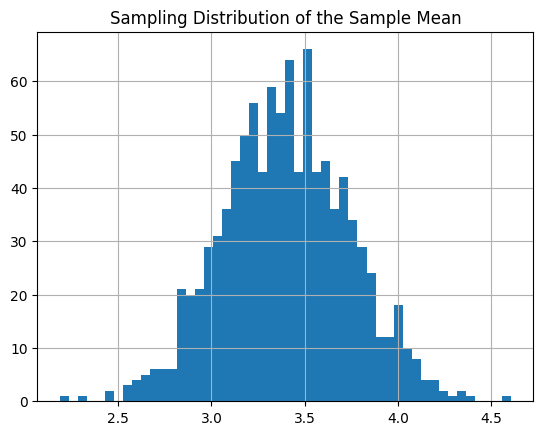

In [21]:
# Plot the Histogram
sampling_dist_sample_mean.hist(bins=50)

plt.title("Sampling Distribution of the Sample Mean");

This looks very much like a normal distribution!

To fully appreciate this, let's recap where the data for it came from:

* We started with our population of 12 500 elements, which had a very non normal, bimodal distribution.
* From this bimodal population, we took 1000 samples, each sample with size 50.
* We then calculated the mean of each of the 1000 samples, giving us 1000 sample means.
* All of these 1000 sample means taken together are called the **sampling distribution of the sample mean** - and their distribution is approximately normal!

> **Note:** The larger the size of each individual sample and the more samples are being considered, the more closely the sampling distribution of the sample mean will approximate the normal distribution. As a rule of thumb, the sample size must be at least 30 for the Central Limit Theorem to hold true. This is because large samples are less likely to be affected by random variation.

##4.4&nbsp;Distribution mean

The mean of the sampling distribution of the sample mean above should be very close to the true mean of the population.

In [22]:
# Calculate the mean of the all the sample means.
sdsm_mean = float(sampling_dist_sample_mean.mean())

In [23]:
difference = population.mean() - sdsm_mean
print(f"The difference between the population mean and the mean of the sampling distribution is {round(difference[0], 4)}.")

The difference between the population mean and the mean of the sampling distribution is -0.0114.


##4.5&nbsp;Standard error

We know that in a normal distribution, 68% of the values fall within one standard deviation of the mean. We will check that. But first, a terminology alert:

> The *standard deviation* of the *sampling distribution of the sample mean* is called **standard error of the mean** or simply **standard error**.



What is the difference between the standard error and the standard deviation?

* Standard deviation: measures the dispersion in the population or sample.
* Standard error: measures the dispersion of the sampling distribution of sample mean.

Let's look at the standard error for the samples taken from our population.

In [24]:
# Calculate the standard deviation for our sampling distribution of the sample mean
# i.e. the standard error.
standard_error = float(sampling_dist_sample_mean.std())

Now we will have another look at our sampling distribution of the sample mean, this time including its mean and standard deviation (= standard error).

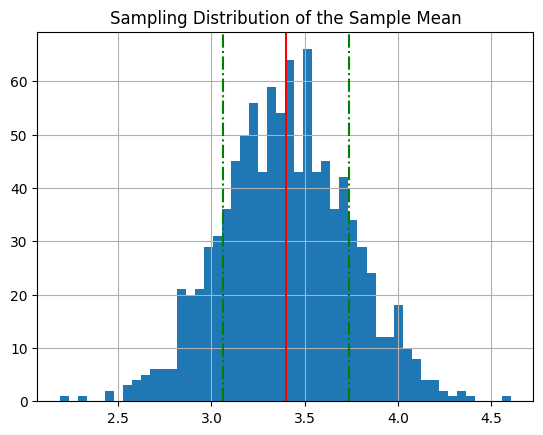

In [25]:
sampling_dist_sample_mean.hist(bins=50)

# Plot vertical lines for the mean, and mean +/- one standard deviation
plt.axvline(sdsm_mean, linestyle="solid", color="r")
plt.axvline(sdsm_mean+standard_error, linestyle="dashdot", color="g")
plt.axvline(sdsm_mean-standard_error, linestyle="dashdot", color="g")
plt.title("Sampling Distribution of the Sample Mean");

#5.&nbsp;Inferences

At the top of this notebook, we claimed that under certain conditions, it is possible to use sample properties to make inferences about the population from which the sample was drawn. We will now see how this can work in practice.

##5.1&nbsp;Mean

Let's recap a few theoretical concepts from the beginning to see how what we just did can be helpful for real use cases.

* We know that the standard error is one standard deviation for our distribution of the sample means.
* We know that 68% of values lie within one standard deviation of the mean of our distribution of sample means.
* Similarly, we know that 95% of values lie within two standard deviations of the mean of our distribution of sample means.
* We can use this knowledge to make an inference about a new, different sample: if its mean is more than two standard deviations away from the mean of our distribution of sample means, it is unlikely that the new sample comes from the same population. In numbers, there is less than a 5% chance that the the new sample is from the same population.

Let's see what this means in terms of numbers.

First, we will use the mean of the sampling distribution of the sample mean and the standard error to define the lower and the upper boundaries. Then, we can derive all the values that are more extreme than these boundaries. These values are rather unlikely to be observed and we should be cautious if we observe any.

In [26]:
# Calculate the lower and upper boundaries
lower_bound = sdsm_mean - 2*standard_error
upper_bound = sdsm_mean + 2*standard_error

print(f"""Range of values within two standard deviations
around the mean of the sampling distribution of the sample mean:
  {round(lower_bound, 2)} - {round(upper_bound, 2)}""")

Range of values within two standard deviations
around the mean of the sampling distribution of the sample mean:
  2.72 - 4.08


Theoretically, this range should contain 95% of the sample means. Let's check whether this is true for our distribution.

In [27]:
# Iterate over all the samples' means.
# Add 1 if the sample mean is within the range we just calculated.

count = 0
for i in sample_means:
    if i > lower_bound and i < upper_bound:
        count +=1
print(f"Percentage of sample means within 2 standard errors of the mean: {count/len(sample_means)*100}")

Percentage of sample means within 2 standard errors of the mean: 95.6


##5.2&nbsp;Standard error

Another useful property of the standard error is that it is directly related to the population's standard deviation.

If you know one of them, you can therefore derive the other one from it.

The standard error corresponds to the standard deviation of the population, divided by the square root of the sample size.

The formula of the standard error is:

$$\sigma_{mean} = \frac{\sigma_{population}}{\sqrt(n)}$$

* $\sigma_{mean}$ is the standard error (i.e. the standard deviation of the sampling distribution of the sample mean)
* $\sigma_{population}$ is the standard deviation of the population from which sample is drawn
* $n$ is the size of the sample

Let's test this with our data.

In [28]:
sample_size

50

In [29]:
# Standard deviation of the population
pop_std = population.std()
pop_std

0    2.438469
dtype: float64

In [30]:
# Derived standard error
pop_std / np.sqrt(sample_size)

0    0.344852
dtype: float64

In [31]:
# True standard error
standard_error

0.3388939745503065

This is reasonably close!

In reality, however, we usually don't know the parameters of the entire population. Luckily, the formula also works approximately if we only know the sample's standard deviation. We can estimate the standard error of the mean by taking the standard deviation of the sample, and dividing with the square root of the sample size.

The formula of the estimated standard error is then:

$$\sigma_{mean} \approx \frac{\sigma_{sample}}{\sqrt(n)}$$

* $\sigma_{mean}$ is the standard error (i.e. the standard deviation of the sampling distribution of the sample mean)
* $\sigma_{sample}$ is the standard deviation of the sample
* $n$ is the size of the sample

In [32]:
# Estimated standard error
sample.std() / np.sqrt(sample_size)

0    0.364068
dtype: float64

This is still quite accurate.

In most cases, we don't know the population standard deviation. Therefore, we will usually estimate it using the sample's standard deviation. For large samples, we can assume that the standard deviation of the sample is reasonably close to the standard deviation of the population.

# Exercise 2
Before moving on, repeat the experiment (located under the header `4. The Sampling Distribution of the Sample Mean`). Change the parameters one by one and observe what happens in each of the following cases:

* Modify the sample size (increase and/or decrease).
* Modify the number of samples taken.
* Add outliers to the population.
* Sample without replacement.

You can copy the code from above and modify it in the cell below.

In [33]:
# Your code here.

#6.&nbsp;Summary

Summarising the main ideas:

* If you draw large, random samples from any population, the means of those samples will be distributed normally around the population mean (regardless of what the distribution of the underlying population looks like).

* Most sample means will lie reasonably close to the poulation mean. The size of the standard error defines which range is "reasonably close" in any particular case.

* The Central Limit Theorem tells us the probability that a sample mean will lie within a certain distance of the population mean. It is relatively unlikely that a sample mean will lie more than two standard errors from the population mean, and extremely unlikely that it will lie three or more standard errors from the population mean.

* The less likely it is that an outcome has been observed by chance, the more confidence we can have in assuming that some other factor is in play.

#7.&nbsp;BONUS: Meet the squirrels

Let's assume that the population values from earlier represent the weights of squirrels from the forest in our neighbourhood. Now, in that case, if we caught a few squirrels from that population as a sample and weighed them, we wouldn't know the mean and the standard deviation of the population. This is normal in real life scenarios.

To get our sample, we go to the forest, catch a random 50 squirrels and register their weights.

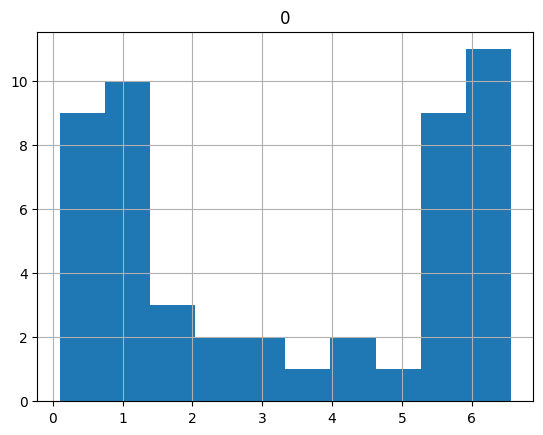

In [34]:
squirrels = population.sample(50, random_state=1990)

squirrels.hist();

We wonder if the average weight of our squirrels sample is close to the 'true' mean of the population (which we can't measure).


In [35]:
# Mean of our sample
mean_squirrels = float(squirrels.mean())
mean_squirrels

3.3492958902381855

The standard deviation of the sample helps to estimate how far the sample mean is likely to be away from the population mean.

It is used to calculate an estimate of the standard deviation of the sampling distribution of the sample mean, which, as we've seen, follows a normal distribution.

In [36]:
# Standard error (standard deviation of the sampling distribution of the sample mean)
sem_squirrels = float(squirrels.std() / np.sqrt(len(squirrels)))
sem_squirrels

0.34511169176753176

We can also calculate the standard error using scipy

In [37]:
stats.sem(squirrels)

array([0.34511169])

We know that no matter the distribution of our sample or the population, the sampling distribution of the sample mean is normal (Central Limit Theorem).

Knowing that, we can use the properties of the normal distribution and information about our sample to make inferences about the true population.

We have:

1. The mean of the sample.
2. An estimation of the standard error.

This allows us to simulate a sampling distribution of the sample mean built around the mean of our sample.

The sampling distribution that we will simulate will, of course, be normally distributed. We can plot it and add lines that mark the range of two standard errors above and below the mean. This represents the interval that contains 95% of the observations.

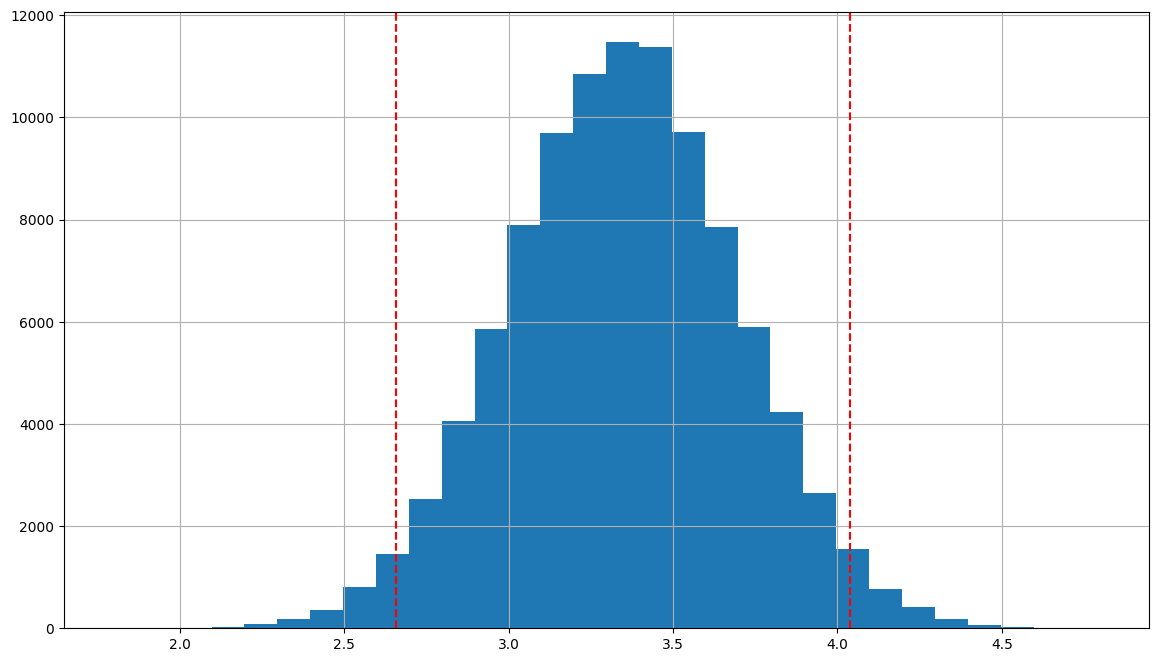

In [38]:
# Generating a normal distribution centered around the sample mean.
# Its standard deviation is the estimated standard error.
sampling_dist_squirrels = stats.norm.rvs(loc=mean_squirrels,
                                         scale=sem_squirrels,
                                         size=100000,
                                 #        random_state=123
                                         )

norm_dist = pd.Series(sampling_dist_squirrels)

norm_dist.hist(bins=30, figsize=(14, 8))

plt.axvline(mean_squirrels-sem_squirrels*2, color = 'r', linestyle="--")
plt.axvline(mean_squirrels+sem_squirrels*2, color = 'r', linestyle="--");

What do this distribution and this interval tell us?

Suppose we take many, many samples, calculated their mean and the estimated standard error and plotted a similar graph as the one above. For 95% of our samples, the interval between the lower and the upper boundary would contain the true population mean. Only for 5% of the samples, the true population mean would lie outside (2.5% on each side).

This is why we call the range between the lower and the upper boundary the 95% **confidence interval**.
> A confidence interval is a *plausible range of values* for a population parameter (in this case, the mean).

Let's calculate the upper and lower boundaries of this interval.

In [39]:
# Lower boundary of the confidence interval.
mean_squirrels - sem_squirrels*2

# If you want the results to be closer to the scipy calculation below,
# change the "2" for a "1.96".

2.6590725067031222

In [40]:
# Upper boundary of the confidence interval.
mean_squirrels + sem_squirrels*2

# If you want the results to be closer to the scipy calculation below,
# change the "2" for a "1.96".

4.039519273773249

In [41]:
# Using scipy to calculate the confidence interval.
norm_interval = stats.norm.interval(confidence=0.95, # the confidence level
                 loc=mean_squirrels, # mean of our sample
                 scale=sem_squirrels) # standard error of the mean
norm_interval

(2.672889403730135, 4.025702376746236)

We have made some estimations that might be imperfect, for example when calculating the standard error. Also, our sample is not really big (only 50 squirrels). If we want an extra degree of confidence or, in other words, a more conservative estimate of the confidence interval, we can use a t-distribution instead of a normal distribution.

A t-distribution resembles a normal distribution. For smaller sample sizes though, it is 'flatter' and has 'fat tails'. For bigger samples, it is indistinguishable from a normal distribution. We will go through its properties more in depth when we talk about hypothesis tests.



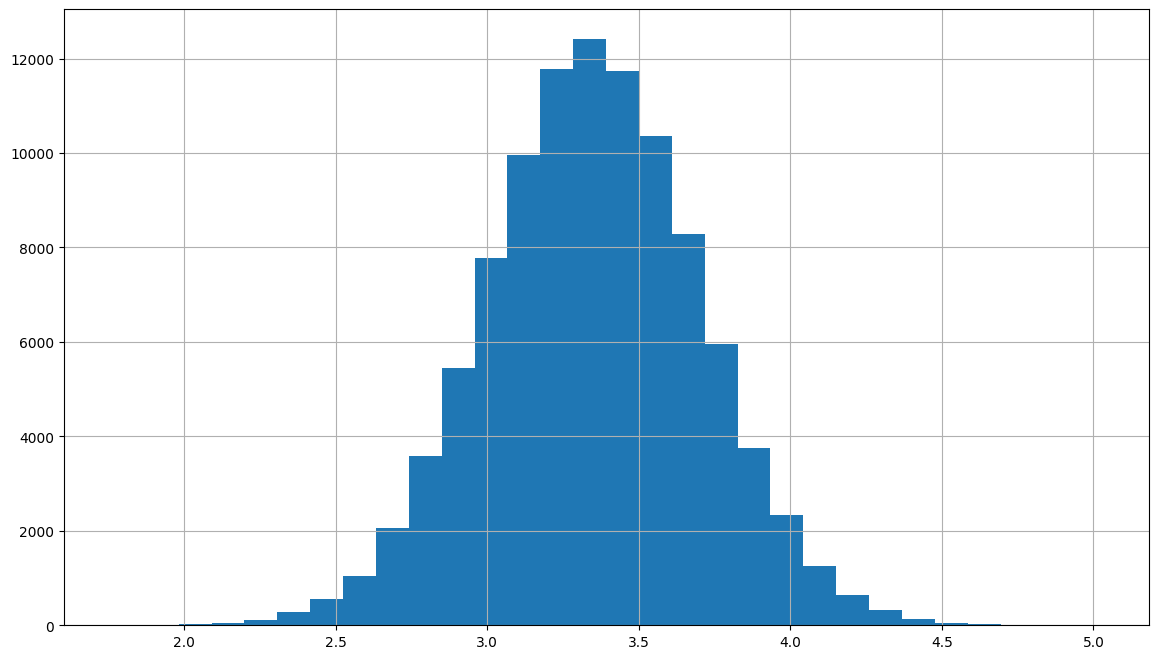

In [42]:
# Generating a t-distribution
sampling_t_dist_squirrels = stats.t.rvs(loc=mean_squirrels, # The mean of the sample.
                                        scale=sem_squirrels, # An estimation of the standard error.
                                        df=len(squirrels), # Our sample size
                                        size=100000,
                                        random_state=123
                                         )
sampling_t_dist_squirrels = pd.Series(sampling_t_dist_squirrels)

sampling_t_dist_squirrels.hist(bins=30, figsize=(14, 8));

The confidence interval is slightly bigger compared to the one derived from the normal distribution.

In [43]:
# using a t distribution:
t_interval = stats.t.interval(
            0.95, # the confidence level
            len(squirrels), # degrees of freedom = sample size - 1
            loc=mean_squirrels, # mean of our sample
            scale=sem_squirrels # standard error of the mean
            )

print(f"""t-distribution:      {t_interval}
normal distribution: {norm_interval}""")

t-distribution:      (2.6561186578692837, 4.042473122607087)
normal distribution: (2.672889403730135, 4.025702376746236)


# Exercise 3

Did the true mean really fall within the 95% confidence interval?

In [44]:
# Your code here.
mean_squirrels #this was the mean of our sample

3.3492958902381855

In [45]:
# it lies between the boundaries that we expect
t_interval

# so it is plausible that the sample stems fom our population

(2.6561186578692837, 4.042473122607087)

Probably yes, but beware: by definition, 5% of the time it will not!



# Exercise 4


Can you run the experiment 10 000 times and prove it?

In [ ]:
# Your code here.
# sample solution

import warnings
# Suppress Pandas warnings
warnings.simplefilter("ignore")
pd.options.mode.chained_assignment = None  # This suppresses SettingWithCopyWarning



counter = 0
population_mean = float(population.mean())

for i in range(10000):
  i_sample = population.sample(50)
  t_interval = stats.t.interval(
    0.95, # the confidence level
    len(i_sample)-1, # degrees of freedom = sample size - 1
    loc=np.mean(i_sample), # mean of our sample
    scale=stats.sem(i_sample) # standard error of the mean
    )
  if (population_mean > t_interval[0][0]) & (population_mean < t_interval[1][0]):
    counter += 1

print("The true mean falls inside the confidence interval " + str(counter) + " times")